In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## 1. problem statement:-to predict the customer is satisfied or not satisfied 

## 2. data gathering

In [3]:
df=pd.read_csv(r"C:\Users\CHETAK\Desktop\daily class notes\archive\Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
## 3. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
# 1) all columns except last (22)  Arrival Delay in Minutes has some null values others dont have any null vallues.
# 2) except colums satisfaction gender customer type and flight distance hav object type others are in int or float type,
#   so we have to channge object datatype to int or float

In [7]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
df.isna().sum()/len(df)*100

satisfaction                         0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes        

In [10]:
# only Arrival Delay in Minutes column has 30% null values others are 0

In [11]:
df.value_counts().isna()

satisfaction  Gender  Customer Type      Age  Type of Travel   Class     Flight Distance  Seat comfort  Departure/Arrival time convenient  Food and drink  Gate location  Inflight wifi service  Inflight entertainment  Online support  Ease of Online booking  On-board service  Leg room service  Baggage handling  Checkin service  Cleanliness  Online boarding  Departure Delay in Minutes  Arrival Delay in Minutes
dissatisfied  Female  Loyal Customer     7    Business travel  Business  1819             2             3                                  3               3              2                      2                       2               2                       1                 2                 4                 1                3            2                0                           0.0                         False
satisfied     Female  Loyal Customer     51   Business travel  Business  377              1             1                                  1               1             

In [12]:
df.shape

(129880, 23)

## 4. feature engineering

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

#### A. satisfaction

In [14]:
df['satisfaction']

0            satisfied
1            satisfied
2            satisfied
3            satisfied
4            satisfied
              ...     
129875       satisfied
129876    dissatisfied
129877    dissatisfied
129878    dissatisfied
129879    dissatisfied
Name: satisfaction, Length: 129880, dtype: object

In [15]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [16]:
df['satisfaction'].value_counts().to_dict()

{'satisfied': 71087, 'dissatisfied': 58793}

In [17]:


df['satisfaction'].replace({'satisfied': 1, 'dissatisfied': 0},inplace=True)

In [18]:
df['satisfaction'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [19]:
df['satisfaction'].tail(5)

129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, dtype: int64

In [20]:
# column satisfaction has nominal data we can use one hot encoding for nominal data but value count is less than 5,
# therefore we directly use replace function here

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction'>

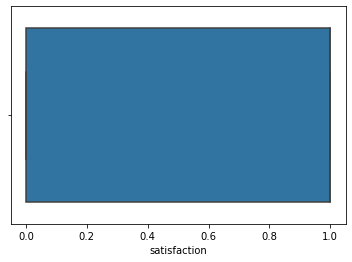

In [21]:
sns.boxplot(df['satisfaction'])

In [22]:
# we dont have outliers in satisfaction column

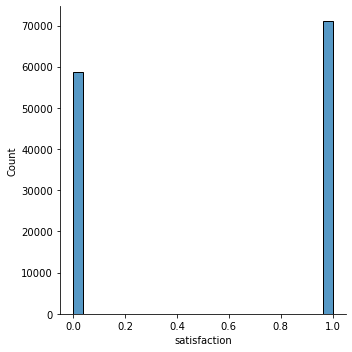

In [23]:
sns.displot(df['satisfaction'])

#### B. Gender

In [24]:
df['Gender']

0         Female
1           Male
2         Female
3         Female
4         Female
           ...  
129875    Female
129876      Male
129877      Male
129878      Male
129879    Female
Name: Gender, Length: 129880, dtype: object

In [25]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [26]:
df['Gender'].value_counts().sum()

129880

In [27]:
df['Gender'].value_counts().isna()

Female    False
Male      False
Name: Gender, dtype: bool

In [28]:
df['Gender'].value_counts().to_dict()

{'Female': 65899, 'Male': 63981}

In [29]:
df['Gender'].replace({'Female': 0, 'Male': 1},inplace=True)

In [30]:
df['Gender']

0         0
1         1
2         0
3         0
4         0
         ..
129875    0
129876    1
129877    1
129878    1
129879    0
Name: Gender, Length: 129880, dtype: int64

In [31]:
# column gender has nominal data we can use one hot encoding for nominal data but value count is less than 5,
# therefore we directly use replace function here..

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender'>

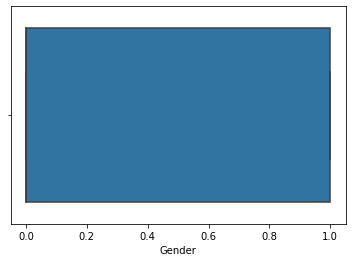

In [32]:
sns.boxplot(df['Gender'])

In [33]:
# no outliers in gender column

#### C. Customer Type

In [34]:
df['Customer Type']

0            Loyal Customer
1            Loyal Customer
2            Loyal Customer
3            Loyal Customer
4            Loyal Customer
                ...        
129875    disloyal Customer
129876    disloyal Customer
129877    disloyal Customer
129878    disloyal Customer
129879    disloyal Customer
Name: Customer Type, Length: 129880, dtype: object

In [35]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [36]:
df['Customer Type'].isna().sum()

0

In [37]:
df['Customer Type'].value_counts().to_dict()

{'Loyal Customer': 106100, 'disloyal Customer': 23780}

In [38]:
df['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0},inplace=True)

In [39]:
df['Customer Type']

0         1
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    0
129879    0
Name: Customer Type, Length: 129880, dtype: int64

In [40]:
# column customer type has nominal data we can use one hot encoding for nominal data but value count is less than 5,
# therefore we directly use replace function here..

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Type'>

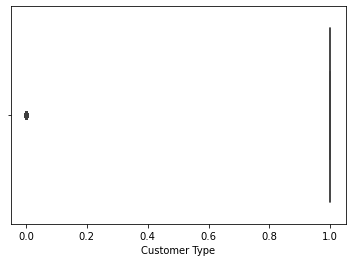

In [41]:
sns.boxplot(df['Customer Type'])

In [42]:
# here we outlier very less outliers nearly=0,which we can ignore for large data

#### D Type of Travel

In [43]:
df['Type of Travel']

0         Personal Travel
1         Personal Travel
2         Personal Travel
3         Personal Travel
4         Personal Travel
               ...       
129875    Personal Travel
129876    Personal Travel
129877    Personal Travel
129878    Personal Travel
129879    Personal Travel
Name: Type of Travel, Length: 129880, dtype: object

In [44]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [45]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [46]:
df['Type of Travel'].isna().sum()

0

In [47]:
df['Type of Travel'].value_counts().to_dict()

{'Business travel': 89693, 'Personal Travel': 40187}

In [48]:
df['Type of Travel'].replace({'Business travel': 1, 'Personal Travel': 0},inplace=True)

In [49]:
df['Type of Travel']

0         0
1         0
2         0
3         0
4         0
         ..
129875    0
129876    0
129877    0
129878    0
129879    0
Name: Type of Travel, Length: 129880, dtype: int64

In [50]:
# column travel type has nominal data we can use one hot encoding for nominal data but value count is less than 5,
# therefore we directly use replace function here..

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of Travel'>

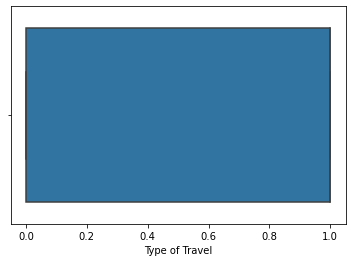

In [51]:
sns.boxplot(df['Type of Travel'])

In [52]:
# no outliers

#### E. Class

In [53]:
df['Class']

0              Eco
1         Business
2              Eco
3              Eco
4              Eco
            ...   
129875         Eco
129876    Business
129877         Eco
129878         Eco
129879         Eco
Name: Class, Length: 129880, dtype: object

In [54]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [55]:
df['Class'].isna().sum()

0

In [56]:
df['Class'].value_counts().to_dict()

{'Business': 62160, 'Eco': 58309, 'Eco Plus': 9411}

In [57]:
df['Class'].replace({'Business': 2, 'Eco': 0, 'Eco Plus': 1},inplace=True)

In [58]:
df['Class']

0         0
1         2
2         0
3         0
4         0
         ..
129875    0
129876    2
129877    0
129878    0
129879    0
Name: Class, Length: 129880, dtype: int64

In [59]:
# column class has ordinal data we can use lebale encoding for nominal data but value count is less than 5,
# therefore we directly use replace function here..

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class'>

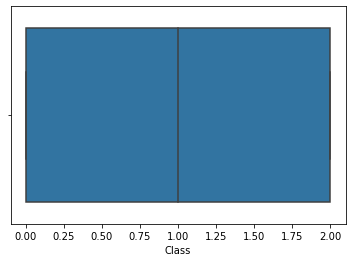

In [60]:
sns.boxplot(df['Class'])

In [61]:
# no outlies

#### F. Arrival Delay in Minutes

In [62]:
df['Arrival Delay in Minutes']

0           0.0
1         305.0
2           0.0
3           0.0
4           0.0
          ...  
129875      0.0
129876    172.0
129877    163.0
129878    205.0
129879    186.0
Name: Arrival Delay in Minutes, Length: 129880, dtype: float64

In [63]:
df['Arrival Delay in Minutes'].isna().sum()

393

In [64]:
df['Arrival Delay in Minutes'].isna().sum()/len(df)*100

0.3025870033877425

In [65]:
# nearly 30% data is not available we have to fill that data
df['Arrival Delay in Minutes'].value_counts().sum()

129487

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrival Delay in Minutes'>

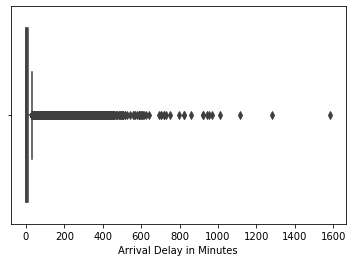

In [66]:
sns.boxplot(df['Arrival Delay in Minutes'])

In [67]:
# so many outlires are also there we have to handle that outlires
# first we try to fill data

In [68]:
df['Arrival Delay in Minutes'].mean()

15.09112883918849

In [69]:
mean=df['Arrival Delay in Minutes'].mean()
mean

15.09112883918849

In [70]:
df['Arrival Delay in Minutes'].median()

0.0

In [71]:
df['Arrival Delay in Minutes'].mode()

0    0.0
dtype: float64

In [72]:
# here for better model we use mean to fill null values

In [73]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(),inplace=True)

In [74]:
df['Arrival Delay in Minutes'].isna().sum()

0

In [75]:
# we succesfully fill the null values with mean value

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrival Delay in Minutes'>

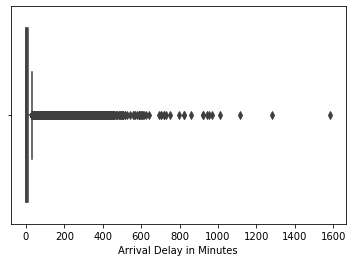

In [76]:
sns.boxplot(df['Arrival Delay in Minutes'])

In [77]:
# for handling outlires we can use many methods like z_score ,IQR,cuberoot,sqrt,but we use IQR here because data is
# not normally distributed its left skewd data

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

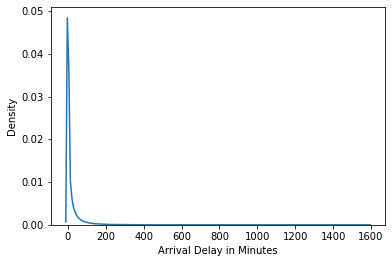

In [78]:
sns.kdeplot(df['Arrival Delay in Minutes'])

In [79]:
# IQR=q3-q1
# UT=q3+1.5*IQR
# LT=q1-1.5*IQR

In [80]:
q1=df['Arrival Delay in Minutes'].quantile(0.25)
q1

0.0

In [81]:
q3=df['Arrival Delay in Minutes'].quantile(0.75)
q3

13.0

In [82]:
IQR=q3-q1
IQR

13.0

In [83]:
UT=q3+1.5*IQR
UT

32.5

In [84]:

LT=q1-1.5*IQR
LT
# in boxplot we can see that outliers are on uppertail only so we can ingore lower tail

-19.5

In [85]:
df.loc[df['Arrival Delay in Minutes']>UT,'Arrival Delay in Minutes']=mean

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrival Delay in Minutes'>

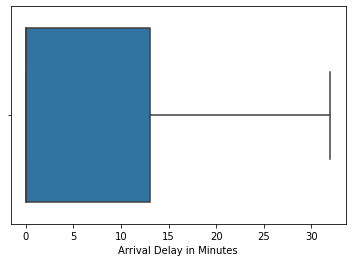

In [86]:


sns.boxplot(df['Arrival Delay in Minutes'])

<AxesSubplot:>

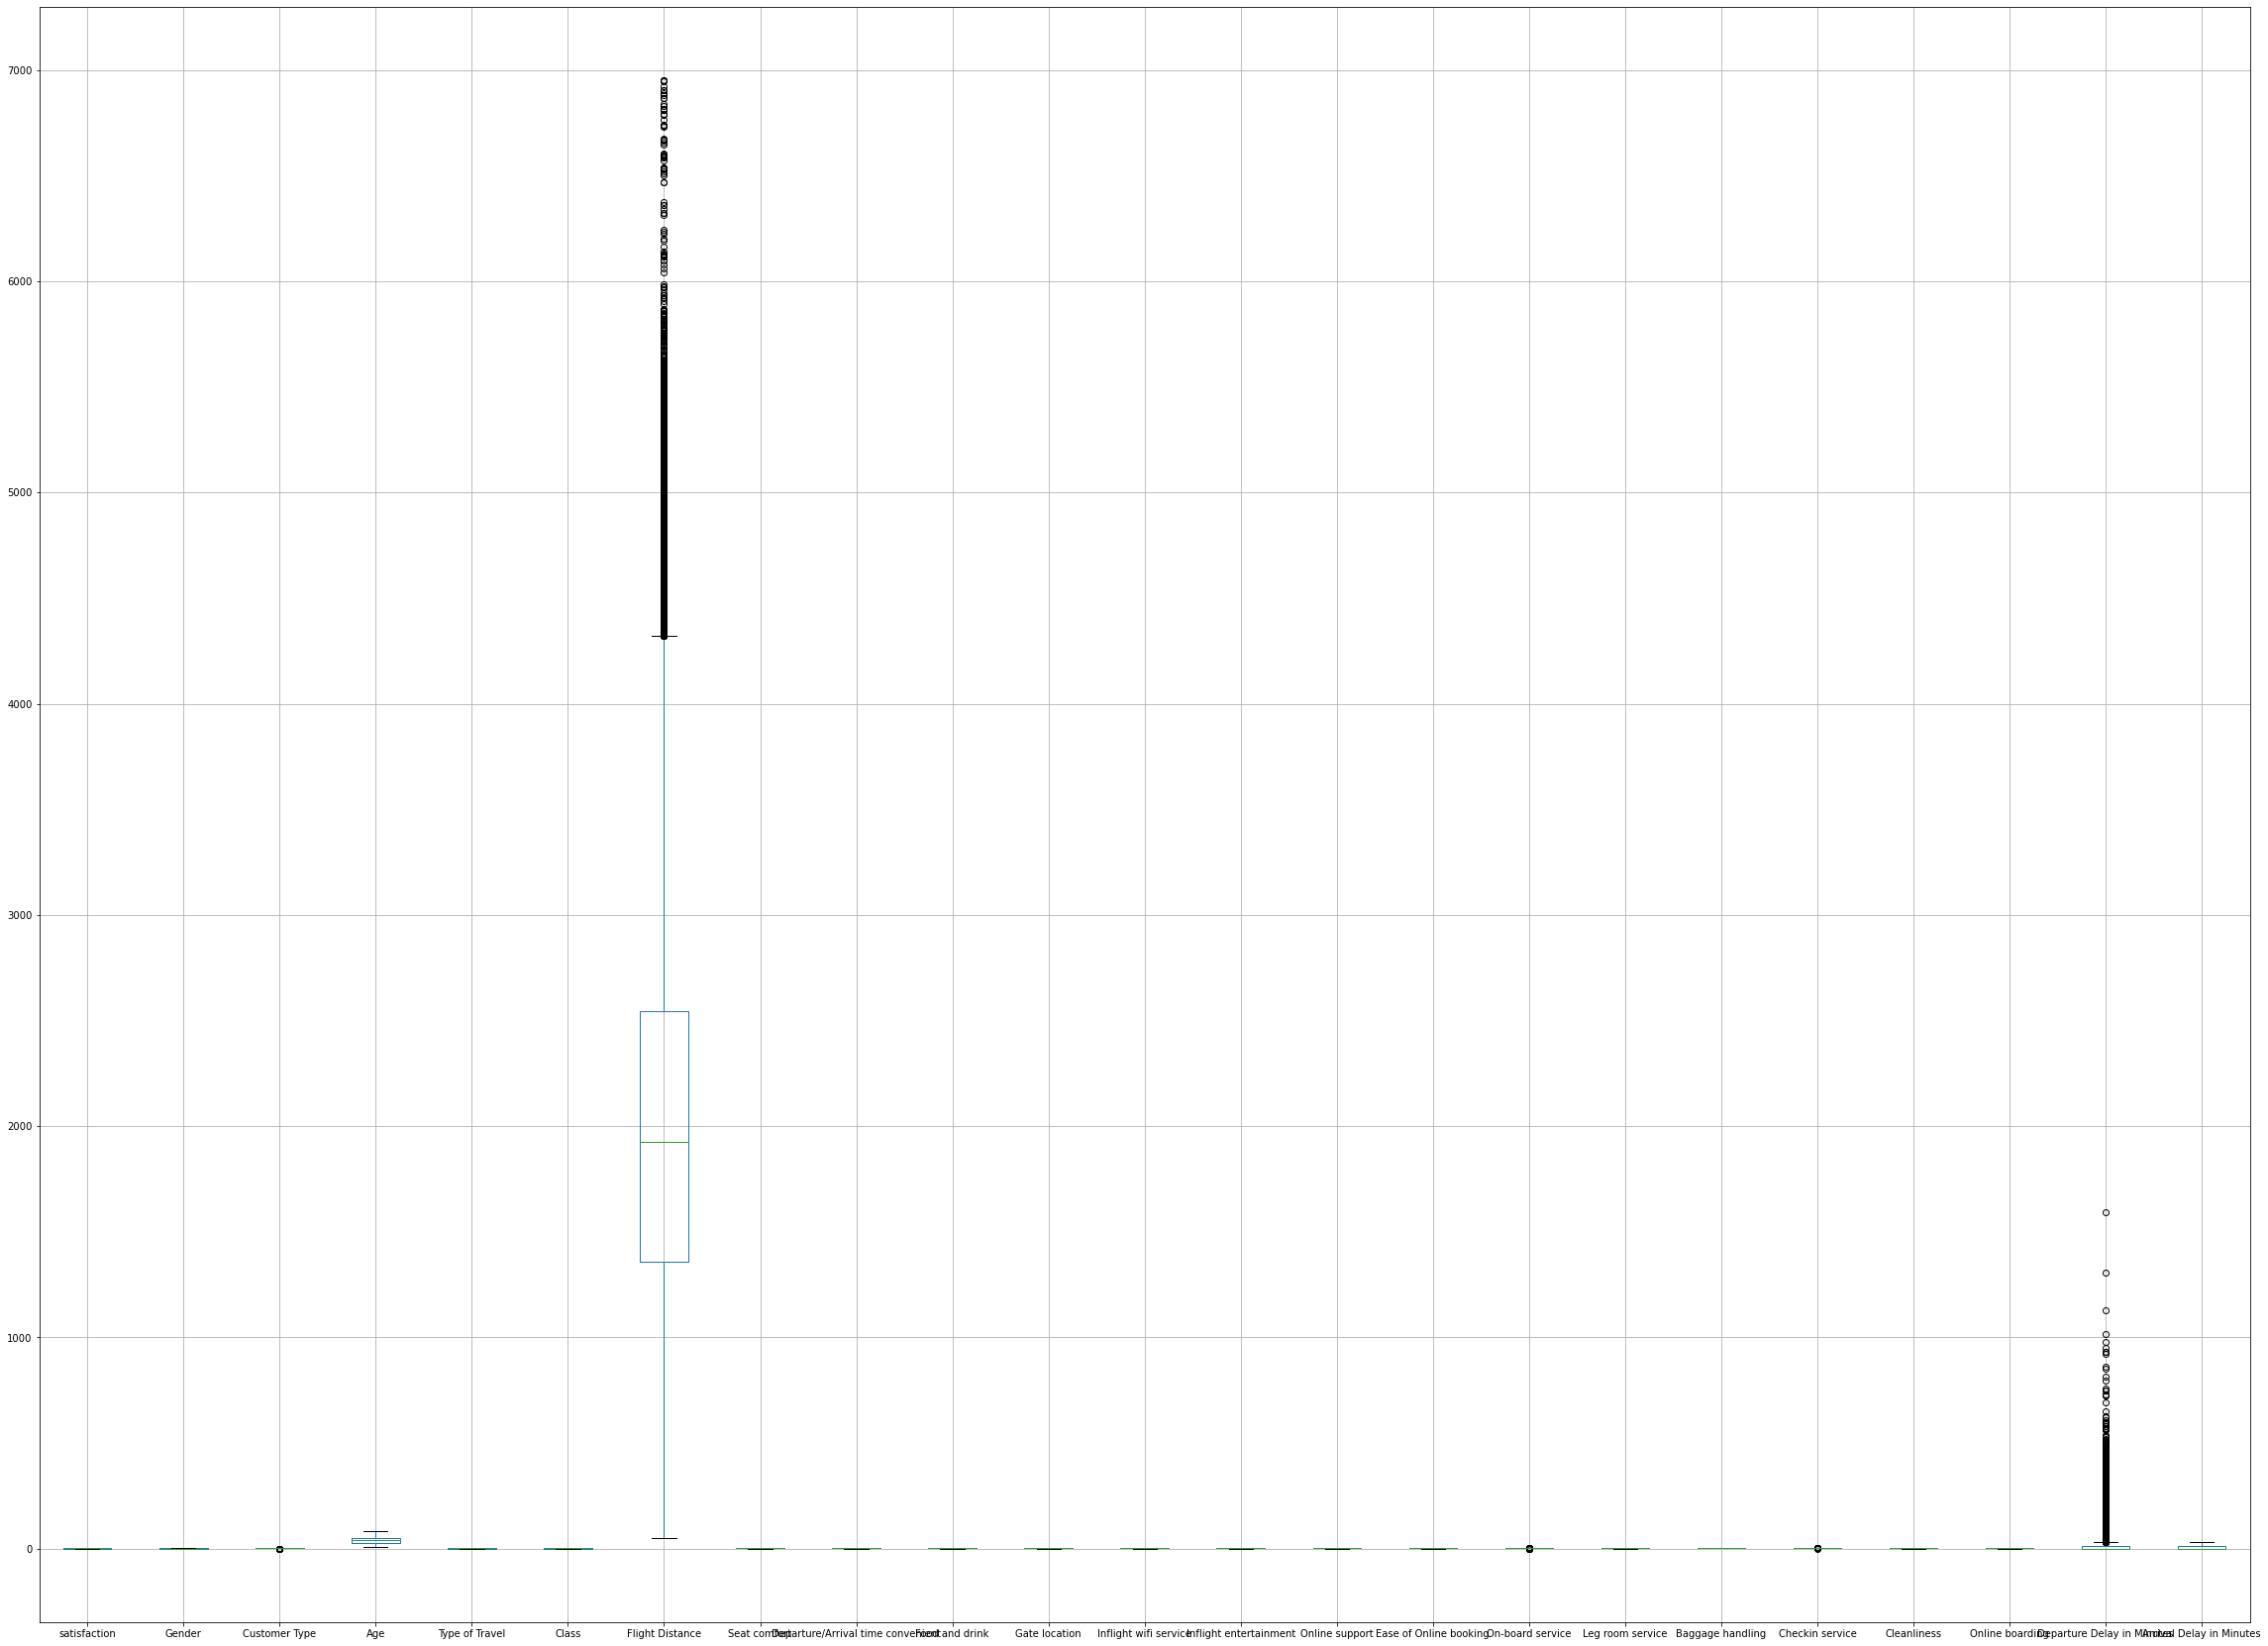

In [87]:
plt.figure(figsize=(40,30))

df.boxplot()

In [88]:
# now we have outliers in flight distance and Departure Delay in Minutes

#### G.Flight Distance

In [89]:
df['Flight Distance']

0          265
1         2464
2         2138
3          623
4          354
          ... 
129875    1731
129876    2087
129877    2320
129878    2450
129879    4307
Name: Flight Distance, Length: 129880, dtype: int64

In [90]:
q1=df['Flight Distance'].quantile(0.25)
q1

1359.0

In [91]:
q3=df['Flight Distance'].quantile(0.75)
q3

2544.0

In [92]:
IQR=q3-q1
IQR

1185.0

In [93]:
UT=q3+1.5*IQR
UT

4321.5

In [94]:
LT=q1-1.5*IQR
LT

-418.5

In [95]:
df['Flight Distance'].mean()

1981.409054511857

In [96]:
df['Flight Distance'].median()

1925.0

In [97]:
df['Flight Distance'].mode()

0    1963
dtype: int64

In [98]:
df.loc[df['Flight Distance']>UT,'Flight Distance']=1950

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flight Distance'>

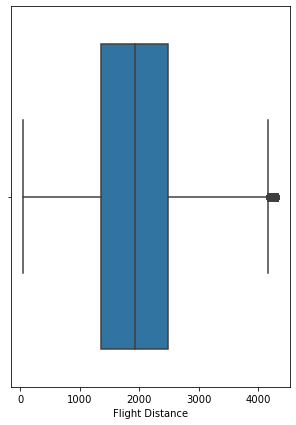

In [99]:
plt.figure(figsize=(5,7))

sns.boxplot(df['Flight Distance'])

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Departure Delay in Minutes'>

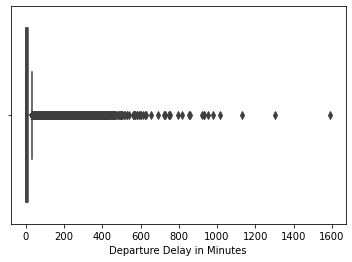

In [100]:
sns.boxplot(df['Departure Delay in Minutes'])

In [101]:
q1=df['Departure Delay in Minutes'].quantile(0.25)
q1

0.0

In [102]:
q3=df['Departure Delay in Minutes'].quantile(0.75)
q3

12.0

In [103]:
IQR=q3-q1
IQR

12.0

In [104]:
UT1=q3+1.5*IQR
UT1

30.0

In [105]:
LT1=q1-1.5*IQR
LT1

-18.0

In [106]:
m=df['Departure Delay in Minutes'].mean()
m

14.713712657838004

In [107]:
df.loc[df['Departure Delay in Minutes']>UT1,'Departure Delay in Minutes']=m

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Departure Delay in Minutes'>

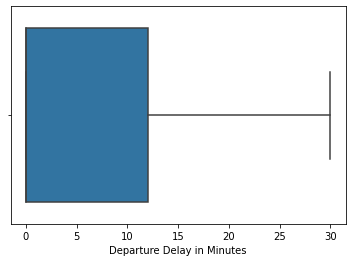

In [108]:

sns.boxplot(df['Departure Delay in Minutes'])

<AxesSubplot:>

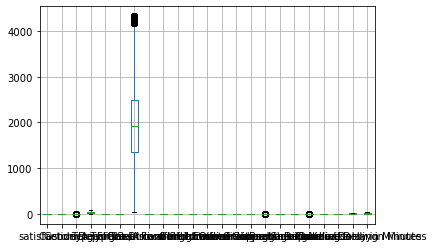

In [109]:

df.boxplot()

In [110]:
# here we handle  nearly all outliers succesfully

## 5. feature selection

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [112]:
# now we are ready train our model if we see data carefully then we can say that the column Departure/Arrival time convenient,
# is not important for us also it is not usefull our model so we can drop Departure/Arrival time convenient column

In [113]:
df.drop(['Departure/Arrival time convenient'],axis=1,inplace=True)

In [114]:
df.head(3)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,65,0,0,265,0,0,2,...,2,3,3,0,3,5,3,2,0.000000,0.000000
1,1,1,1,47,0,2,2464,0,0,3,...,2,3,4,4,4,2,3,2,14.713713,15.091129
2,1,0,1,15,0,0,2138,0,0,3,...,2,2,3,3,4,4,4,2,0.000000,0.000000


In [115]:
y=df[['satisfaction']]
x=df.drop('satisfaction',axis=1)

## 6. model trainnig

In [116]:
# as we know it is classification type so we can use logistic regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=17,stratify=y)


In [119]:
x_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
33879,1,1,28,0,1,2311,4,4,4,1,...,1,1,5,3,3,5,4,1,8.000000,0.000000
93184,0,1,58,1,2,1749,2,2,2,2,...,5,4,4,4,4,3,4,5,5.000000,0.000000
17173,1,1,32,0,0,2310,2,2,2,3,...,3,3,5,2,5,5,4,3,14.713713,15.091129
58953,1,0,35,1,2,2488,4,4,2,4,...,3,4,2,4,4,4,1,4,10.000000,19.000000
116890,1,1,51,1,2,238,4,4,4,2,...,1,5,5,5,5,5,5,3,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26727,0,1,44,0,0,271,5,5,5,5,...,5,5,3,4,5,4,5,5,0.000000,0.000000
68316,1,1,50,1,0,2182,1,3,3,1,...,1,1,1,3,4,2,4,1,0.000000,0.000000
42562,0,0,23,1,0,2440,1,1,3,4,...,4,4,3,4,4,5,4,4,1.000000,2.000000
17540,1,1,69,0,0,1125,2,2,2,1,...,1,1,5,5,4,4,5,1,0.000000,0.000000


In [120]:
y_test

,satisfaction
2560,1
10651,0
83296,0
65421,1
6107,1
...,...
79494,0
48612,0
78259,1
128362,1


In [121]:
lg=LogisticRegression()

In [122]:
lg.fit(x_train,y_train)

C:\Users\CHETAK\ana\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\CHETAK\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
y_pred=lg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [124]:
y_test

,satisfaction
2560,1
10651,0
83296,0
65421,1
6107,1
...,...
79494,0
48612,0
78259,1
128362,1


In [125]:
y_train.value_counts() / len(y_train)*100

satisfaction
1               54.732574
0               45.267426
dtype: float64

C:\Users\CHETAK\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

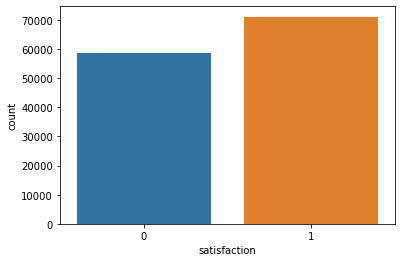

In [126]:
sns.countplot(df['satisfaction'])

In [127]:
# nearly balance predictions we can calculate accuracy_score

## 7. model evalution

In [128]:
#### Testing Data Evaluation
y_pred_test = lg.predict(x_test)

acc = accuracy_score(y_test,y_pred_test)
print(f"Accuracy Score = {acc}")

print('*'*50)




cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('cnf_matrix\n\n',cnf_matrix)

print('*'*50)

clf_report= classification_report(y_test, y_pred_test)
print('clf_report\n\n\n',clf_report)

print('*'*50)


m_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print(m_cnf_matrix)

Accuracy Score = 0.7609793655682168
**************************************************
cnf_matrix

 [[ 9921  4777]
 [ 2984 14788]]
**************************************************
clf_report


               precision    recall  f1-score   support

           0       0.77      0.67      0.72     14698
           1       0.76      0.83      0.79     17772

    accuracy                           0.76     32470
   macro avg       0.76      0.75      0.76     32470
weighted avg       0.76      0.76      0.76     32470

**************************************************
[[[14788  2984]
  [ 4777  9921]]

 [[ 9921  4777]
  [ 2984 14788]]]


In [129]:
#### Training Data Evaluation
y_pred_train = lg.predict(x_train)
acc = accuracy_score(y_train,y_pred_train)
print(f"Accuracy Score = {acc}")

print('*'*50)



cnf_matrix = confusion_matrix(y_train, y_pred_train)
print(cnf_matrix)

print('*'*50)


clf_report= classification_report(y_train, y_pred_train)
print(clf_report)

print('*'*50)

m_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print(m_cnf_matrix)

Accuracy Score = 0.7627040344933785
**************************************************
[[29999 14096]
 [ 9019 44296]]
**************************************************
              precision    recall  f1-score   support

           0       0.77      0.68      0.72     44095
           1       0.76      0.83      0.79     53315

    accuracy                           0.76     97410
   macro avg       0.76      0.76      0.76     97410
weighted avg       0.76      0.76      0.76     97410

**************************************************
[[[44296  9019]
  [14096 29999]]

 [[29999 14096]
  [ 9019 44296]]]


In [130]:
# our accuracy is around 77% we have to incerase this upto 95% we can do regularization

In [138]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, RidgeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
ls = Lasso()
ls.fit(x_train,y_train)

Lasso()

In [139]:


hyp_alpha = {'alpha':np.arange(1,10,1)}

gscv_lasso_model = GridSearchCV(ls,hyp_alpha)
gscv_lasso_model.fit(x_train,y_train)

gscv_lasso_model.best_estimator_

Lasso(alpha=1)

In [140]:
model = Lasso(alpha=0.01)

model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [141]:
#### Testing Data Evaluation
y_pred_test = model.predict(x_test)
y_pred_test


r2_lasso = r2_score(y_test,y_pred_test)
print(f"R2 = {r2_lasso}")

mse_lasso = mean_squared_error(y_test,y_pred_test)
print(f"MSE = {mse_lasso}")



R2 = 0.46811521721696037
MSE = 0.131779402989884


In [142]:
# with regularization our acccuracy is not increasing

In [150]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [151]:
#### Testing  Data 

y_pred = dt_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE",mae)

r2 = r2_score(y_test,y_pred)
print("R Sequared = ",r2)

MSE 0.06347397597782568
MAE 0.06347397597782568
R Sequared =  0.7438079004809778


In [ ]:
# wtih decision tress also we are facing same problem

In [166]:
# lets try with feature selection 

In [152]:
feature_score=dt_model.feature_importances_
feature_score

array([0.01949004, 0.04642829, 0.02566794, 0.03818659, 0.02310113,
       0.03336127, 0.17984563, 0.01095382, 0.0323568 , 0.00621875,
       0.38853888, 0.01988182, 0.06507221, 0.01012315, 0.01676238,
       0.01574945, 0.02024599, 0.01852115, 0.01093123, 0.00813606,
       0.01042744])

In [155]:
s=pd.Series(feature_score,index=x.columns)
s

Gender                        0.019490
Customer Type                 0.046428
Age                           0.025668
Type of Travel                0.038187
Class                         0.023101
Flight Distance               0.033361
Seat comfort                  0.179846
Food and drink                0.010954
Gate location                 0.032357
Inflight wifi service         0.006219
Inflight entertainment        0.388539
Online support                0.019882
Ease of Online booking        0.065072
On-board service              0.010123
Leg room service              0.016762
Baggage handling              0.015749
Checkin service               0.020246
Cleanliness                   0.018521
Online boarding               0.010931
Departure Delay in Minutes    0.008136
Arrival Delay in Minutes      0.010427
dtype: float64

In [156]:
s.sort_values()

Inflight wifi service         0.006219
Departure Delay in Minutes    0.008136
On-board service              0.010123
Arrival Delay in Minutes      0.010427
Online boarding               0.010931
Food and drink                0.010954
Baggage handling              0.015749
Leg room service              0.016762
Cleanliness                   0.018521
Gender                        0.019490
Online support                0.019882
Checkin service               0.020246
Class                         0.023101
Age                           0.025668
Gate location                 0.032357
Flight Distance               0.033361
Type of Travel                0.038187
Customer Type                 0.046428
Ease of Online booking        0.065072
Seat comfort                  0.179846
Inflight entertainment        0.388539
dtype: float64

<AxesSubplot:>

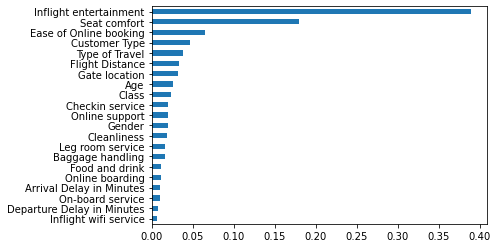

In [159]:
s.sort_values().plot(kind='barh')

In [160]:
# Inflight wifi service         0.006219
# Departure Delay in Minutes    0.008136
# On-board service              0.010123
# Arrival Delay in Minutes      0.010427
# Online boarding               0.010931
# Food and drink                0.010954
# above features have very low importance in this model so can drop that also

In [162]:
df.drop(['Inflight wifi service','Departure Delay in Minutes','On-board service','Arrival Delay in Minutes','Online boarding',
'Food and drink'],axis=1,inplace=True)

In [163]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Gate location,Inflight entertainment,Online support,Ease of Online booking,Leg room service,Baggage handling,Checkin service,Cleanliness
0,1,0,1,65,0,0,265,0,2,4,2,3,0,3,5,3
1,1,1,1,47,0,2,2464,0,3,2,2,3,4,4,2,3
2,1,0,1,15,0,0,2138,0,3,0,2,2,3,4,4,4
3,1,0,1,60,0,0,623,0,3,4,3,1,0,1,4,1
4,1,0,1,70,0,0,354,0,3,3,4,2,0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,0,29,0,0,1731,5,3,5,2,2,3,4,4,4
129876,0,1,0,63,0,2,2087,2,4,1,1,3,3,3,1,2
129877,0,1,0,69,0,0,2320,3,3,2,2,4,3,4,2,3
129878,0,1,0,66,0,0,2450,3,2,2,2,3,2,3,2,1


In [164]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [165]:
y_pred = dt_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE",mae)

r2 = r2_score(y_test,y_pred)
print("R Sequared = ",r2)

MSE 0.06301201108715737
MAE 0.06301201108715737
R Sequared =  0.7456724718020769
